<a href="https://colab.research.google.com/github/andreacohen7/healthcare/blob/main/Breast_Cancer_Classification_with_Confusion_Matrix_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Classification with Confusion Matrix
- Andrea Cohen
- 01.03.22

## Task:  
to create a confusion matrix visualized as a heatmap

## Data Source:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

### Preliminary Steps--

#### Mount the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### Import data

In [3]:
path = '/content/cancer.csv'
df = pd.read_csv(path, index_col = 0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Explore the data

In [4]:
display(df.info())
display(df.describe())
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'There are {df.duplicated().sum()} duplicate rows.')
print(f'There are {df.isna().sum().sum()} missing values.')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

None

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


There are 569 rows, and 31 columns.
There are 0 duplicate rows.
There are 0 missing values.


#### Convert the string names of the classes to numeric values

In [5]:
df['diagnosis'] = df['diagnosis'].replace({'B':0, 'M':1})

#### Arrange data into a features matrix and a target vector

In [6]:
y = df['diagnosis']
X = df.drop(columns='diagnosis')

#### Train test split (model validation)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Decision Tree Classifier

In [8]:
dec_tree = DecisionTreeClassifier(random_state = 42)
dec_tree.fit(X_train, y_train)
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.951048951048951


  - The default decision tree had a higher R^2 score on the training data than it did on the test data.

In [9]:
dec_tree.get_depth()

7

  - The default tree had a depth of 7.

In [10]:
depths = list(range(2, 7))
scores = pd.DataFrame(index=depths, columns = ['Test Score', 'Train Score'])
for depth in depths:
  dec_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
  dec_tree.fit(X_train, y_train)
  train_score = dec_tree.score(X_train, y_train)
  test_score = dec_tree.score(X_test, y_test)
  scores.loc[depth, 'Train Score'] = train_score
  scores.loc[depth, 'Test Score'] = test_score
scores.head()

,Test Score,Train Score
2,0.916084,0.946009
3,0.958042,0.971831
4,0.951049,0.995305
5,0.958042,0.995305
6,0.951049,0.997653


In [11]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
3,0.958042,0.971831
5,0.958042,0.995305
4,0.951049,0.995305
6,0.951049,0.997653
2,0.916084,0.946009


  - The optimal max_depth is 3.

In [12]:
dec_tree_3 = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dec_tree_3.fit(X_train, y_train)
train_3_score = dec_tree_3.score(X_train, y_train)
test_3_score = dec_tree_3.score(X_test, y_test)
print(train_3_score)
print(test_3_score)

0.971830985915493
0.958041958041958


  - The r2 of the final model is .97 on the training set, and the r2 of the final model is .96 on the test set.
  - The training and test results have moved closer to each other (a sign that overfitting was reduced). Most importantly, the testing score is higher.

#### Bagging Classifier

In [13]:
bagclass = BaggingClassifier(random_state=42)
bagclass.fit(X_train, y_train)
bagclass.predict(X_test)
bagclass_train_score = bagclass.score(X_train, y_train)
bagclass_test_score = bagclass.score(X_test, y_test)
print(bagclass_train_score)
print(bagclass_test_score)

0.9929577464788732
0.951048951048951


  - The default bagging classifier had a higher R^2 score on the training data than it did on the test data.

In [14]:
estimators = [10, 20, 30, 40, 50, 100]
scores2 = pd.DataFrame(index=estimators, columns = ['Test Score', 'Train Score'])
for num_estimators in estimators:
  bag_class = BaggingClassifier(n_estimators=num_estimators, random_state=42)
  bag_class.fit(X_train, y_train)
  train_score = bag_class.score(X_train, y_train)
  test_score = bag_class.score(X_test, y_test)
  scores2.loc[num_estimators, 'Train Score'] = train_score
  scores2.loc[num_estimators, 'Test Score'] = test_score
scores2.head()

,Test Score,Train Score
10,0.951049,0.992958
20,0.958042,0.997653
30,0.958042,1.0
40,0.958042,0.997653
50,0.958042,1.0


In [15]:
scores2 = scores2.sort_values(by='Test Score', ascending = False)
scores2

,Test Score,Train Score
20,0.958042,0.997653
30,0.958042,1.0
40,0.958042,0.997653
50,0.958042,1.0
100,0.958042,1.0
10,0.951049,0.992958


  - The optimal number of estimators is 20.

In [16]:
best_n_estimators = scores2.index[0]
bag_class_tuned = BaggingClassifier(n_estimators = best_n_estimators, random_state=42)
bag_class_tuned.fit(X_train, y_train)
print(bag_class_tuned.score(X_train, y_train))
print(bag_class_tuned.score(X_test, y_test))

0.9976525821596244
0.958041958041958


  - The r2 of the final model is .99 on the training set, and the r2 of the final model is .96 on the test set.
  - The training and test results have moved closer to each other (a sign that overfitting was reduced). Most importantly, the testing score is higher.

#### Random Forest Classifier

In [17]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf.predict(X_test)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

1.0
0.965034965034965


  - The default random forest had a higher R^2 score on the training data than it did on the test data.

In [18]:
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

11

In [19]:
depths = range(1, max(est_depths))
scores3 = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:
  model = RandomForestClassifier(max_depth = depth, random_state=42)
  model.fit(X_train, y_train)
  scores3.loc[depth, 'Train Score'] = model.score(X_train, y_train)
  scores3.loc[depth, 'Test Score'] = model.score(X_test, y_test)
scores3.head()

,Test Score,Train Score
1,0.965035,0.920188
2,0.965035,0.955399
3,0.965035,0.981221
4,0.965035,0.990610
5,0.965035,0.992958


In [20]:
sorted_scores3 = scores3.sort_values(by='Test Score', ascending=False)
sorted_scores3

,Test Score,Train Score
1,0.965035,0.920188
2,0.965035,0.955399
3,0.965035,0.981221
4,0.965035,0.990610
5,0.965035,0.992958
6,0.965035,0.995305
7,0.965035,0.997653
8,0.965035,0.997653
9,0.965035,1.000000
10,0.965035,1.000000


  - The optimal max_depth is 10.

In [21]:
n_ests = [50, 100, 150, 200, 250]
scores4 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
  model = RandomForestClassifier(max_depth=10, n_estimators=n, random_state=42)
  model.fit(X_train, y_train)
  scores4.loc[n, 'Train Score'] = model.score(X_train, y_train)
  scores4.loc[n, 'Test Score'] = model.score(X_test, y_test)
scores4.head()

,Test Score,Train Score
50,0.972028,1.0
100,0.965035,1.0
150,0.965035,1.0
200,0.965035,1.0
250,0.965035,1.0


In [22]:
sorted_scores4 = scores4.sort_values(by='Test Score', ascending = False)
sorted_scores4.head()

,Test Score,Train Score
50,0.972028,1.0
100,0.965035,1.0
150,0.965035,1.0
200,0.965035,1.0
250,0.965035,1.0


  - The optimal number of estimators is 50.

In [23]:
best_n_estimators2 = sorted_scores4.index[0]
rf_tuned = BaggingClassifier(n_estimators = best_n_estimators2, random_state=42)
rf_tuned.fit(X_train, y_train)
print(rf_tuned.score(X_train, y_train))
print(rf_tuned.score(X_test, y_test))

1.0
0.958041958041958


  - The r2 of the final model is 1.0 on the training set, and the r2 of the final model is .96 on the test set.
  - The training r2 stayed the same and the testing r2 decreased.
  - The default model performed better on the test set than the tuned model.

In [24]:
print(f'Decision Tree Classifier Test R2: {test_3_score}')
print(f'Bagging Classifier Test R2: {bag_class_tuned.score(X_test, y_test)}')
print(f'Random Forest Classifier Test R2: {(rf_test_score)}')

Decision Tree Classifier Test R2: 0.958041958041958
Bagging Classifier Test R2: 0.958041958041958
Random Forest Classifier Test R2: 0.965034965034965


  - Good performance on the testing data is the most important consideration for choosing a model--therefore the three models will be compared based on their Test Scores.
  - The Random Forests Classifier had the highest R2 score.
  - The Random Forests Classifier was the best model.

1. What was the accuracy of the model? 
  - The model was 96% accurate for classifying the diagnosis on the test set.

2. Which condition (Malignant or Benign) is considered the positive class in this data set?
  - The Malignant condition is the positive class in this data set.

#### Make predictions and find actual values using the model

In [25]:
predictions = rf.predict(X_test)
print('Predictions:')
predictions

Predictions:


array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [26]:
print('True values:')
y_test.values

True values:


array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

#### Create a confusion matrix and display it as a dataframe

In [27]:
cm = confusion_matrix(y_test.values, predictions)
cm_df=pd.DataFrame(cm)
cm_df

,0,1
0,87,2
1,3,51


#### Plot the confusion matrix

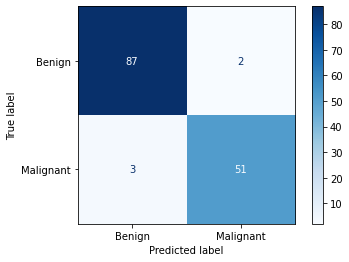

In [28]:
labels = ['Benign', 'Malignant']
ConfusionMatrixDisplay.from_predictions(y_test, predictions, display_labels = labels, cmap = 'Blues');

3. How many false positives were there?
  - There were 2 false positives.

4. How many false negatives were there?
  - There were 3 false negatives.

5. For the breast cancer data set, which do you think is more problematic: false positives or false negatives? Explain.
  - False negatives are more problematic for breast cancer patients because malignant tumors would be considered benign and not treated.
  - False positives are more problematic for insurance companies, medical administrators, and public health officials, because the additional testing of all positive results would be required to confirm the diagnosis and then treat it. 